In [1]:
import pandas as pd
import os
from zipfile import ZipFile

original_dir = os.getcwd()
print("original_dir = ", original_dir)
print()

folds = original_dir.split("\\")
user_home = "\\".join(folds[0:3])
user_subdir = "\\" + "\\".join(folds[3:])
    
print("user_home = ", user_home)
print("user_subdir = ", user_subdir)
print()

original_dir =  C:\Users\korsc\Documents\Flatiron\phase_1\case_study\mod1-case-study-eda

user_home =  C:\Users\korsc
user_subdir =  \Documents\Flatiron\phase_1\case_study\mod1-case-study-eda



In [2]:
got_data = False
while not got_data:
    try:
        google_play_df = pd.read_csv('data\google-play-store-apps\googleplaystore.csv')
        got_data = True
    except Exception as e:
        google_play_df = None
        print(e)
        print("Extracting files from {" + "data\google-play-store-apps.zip" + "}...")
        with ZipFile("data\google-play-store-apps.zip") as myzip:
            myzip.extractall(path="data\google-play-store-apps")
    
print("google_play_df = " + repr( google_play_df))


google_play_df =                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rat

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [3]:
google_play_df = pd.read_csv("data/google-play-store-apps/googleplaystore.csv")
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
google_play_reviews_df = pd.read_csv("data/google-play-store-apps/googleplaystore_user_reviews.csv")
google_play_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Question 1: 
Which app category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

In [5]:
google_play_df = pd.read_csv("data/google-play-store-apps/googleplaystore.csv")
# print(google_play_df.describe)
# print()

print(google_play_df.info())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None



In [6]:
clean_df = google_play_df.loc[google_play_df["Category"] != "1.9"]

def reviews_cleanup(s):
    if isinstance(s, float):
        new_s = float(s)
    elif isinstance(s, str):
        v = float("".join([r for r in s if not r in ["k", "M"]]))
        if s.endswith("k"):
            new_s = v * 1000
        elif s.endswith("M"):
            new_s = v * 1000000
        else:
            new_s = v
    return int(new_s)

def installs_cleanup(s):
    return int("".join([r for r in s if not r in [",", "+"]]))

def sizes_cleanup(s):
    if s == "Varies with device":
        return int(0)
    
    v = float("".join([r for r in s if not r in ["k", "M"]]))
    if s.endswith("k"):
        new_s = v * 1000
    elif s.endswith("M"):
        new_s = v * 1000000
    else:
        new_s = v
    return int(new_s)

reviews_raw = clean_df['Reviews']
reviews_clean = reviews_raw.apply(lambda s: reviews_cleanup(s))
clean_df.insert(clean_df.columns.to_list().index("Reviews") + 1, "iReviews", reviews_clean)

installs_raw = clean_df['Installs']
installs_clean = installs_raw.apply(lambda s: installs_cleanup(s))
clean_df.insert(clean_df.columns.to_list().index("Installs") + 1, "iInstalls", installs_clean)

sizes_raw = clean_df['Size']
sizes_clean = sizes_raw.apply(lambda s: sizes_cleanup(s))
clean_df.insert(clean_df.columns.to_list().index("Size") + 1, "iSize", sizes_clean)

print(clean_df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'iReviews', 'Size', 'iSize',
       'Installs', 'iInstalls', 'Type', 'Price', 'Content Rating', 'Genres',
       'Last Updated', 'Current Ver', 'Android Ver'],
      dtype='object')


In [7]:
split_along_rows = 0

In [8]:
# Here is what happens if we group by iSize
grouped_by_size = clean_df.groupby(by=["iSize"], axis=split_along_rows)
print(grouped_by_size.describe())

           Rating                                                iReviews  \
            count      mean       std  min  25%   50%   75%  max    count   
iSize                                                                       
0          1637.0  4.276298  0.331737  1.9  4.2  4.30  4.50  5.0   1695.0   
8500          1.0  4.600000       NaN  4.6  4.6  4.60  4.60  4.6      1.0   
11000         1.0  4.100000       NaN  4.1  4.1  4.10  4.10  4.1      1.0   
14000         1.0  4.100000       NaN  4.1  4.1  4.10  4.10  4.1      1.0   
17000         2.0  4.300000  0.282843  4.1  4.2  4.30  4.40  4.5      2.0   
...           ...       ...       ...  ...  ...   ...   ...  ...      ...   
96000000     25.0  4.272000  0.394250  3.3  4.1  4.40  4.50  5.0     26.0   
97000000     20.0  4.195000  0.509360  2.5  4.0  4.40  4.45  4.7     20.0   
98000000     14.0  4.371429  0.381149  3.3  4.3  4.50  4.60  4.7     16.0   
99000000     38.0  4.415789  0.177865  4.0  4.4  4.40  4.50  4.7     39.0   

In [9]:
# Here is what happens if we group by iInstalls
grouped_by_installs = clean_df.groupby(by=["iInstalls"], axis=split_along_rows)
print(grouped_by_installs.describe())

            Rating                                                  iReviews  \
             count      mean       std  min    25%  50%    75%  max    count   
iInstalls                                                                      
0              0.0       NaN       NaN  NaN    NaN  NaN    NaN  NaN     15.0   
1              3.0  5.000000  0.000000  5.0  5.000  5.0  5.000  5.0     67.0   
5              9.0  4.611111  1.166667  1.5  5.000  5.0  5.000  5.0     82.0   
10            69.0  4.624638  0.821119  1.0  4.800  5.0  5.000  5.0    386.0   
50            56.0  4.419643  1.046799  1.0  4.350  5.0  5.000  5.0    205.0   
100          309.0  4.363430  0.847641  1.0  4.000  4.7  5.000  5.0    719.0   
500          201.0  4.176617  0.801873  1.0  3.900  4.4  4.700  5.0    330.0   
1000         713.0  4.066760  0.784024  1.0  3.700  4.3  4.600  5.0    907.0   
5000         432.0  4.024537  0.636806  1.4  3.700  4.2  4.500  5.0    477.0   
10000       1010.0  4.039703  0.590458  

In [10]:
# Here is what happens if we group by Category
#
# Note that the list of Categories was cleaned up
#    to exclude the category = "1.9" row, earlier
grouped_by_category = clean_df.groupby(by=["Category"], axis=split_along_rows)
print(grouped_by_category.describe())

                     Rating                                                   \
                      count      mean       std  min    25%  50%    75%  max   
Category                                                                       
ART_AND_DESIGN         62.0  4.358065  0.358297  3.2  4.100  4.4  4.700  5.0   
AUTO_AND_VEHICLES      73.0  4.190411  0.543692  2.1  4.000  4.3  4.600  4.9   
BEAUTY                 42.0  4.278571  0.362603  3.1  4.000  4.3  4.575  4.9   
BOOKS_AND_REFERENCE   178.0  4.346067  0.429046  2.7  4.100  4.5  4.600  5.0   
BUSINESS              303.0  4.121452  0.624422  1.0  3.900  4.3  4.500  5.0   
COMICS                 58.0  4.155172  0.537758  2.8  3.825  4.4  4.500  5.0   
COMMUNICATION         328.0  4.158537  0.426192  1.0  4.000  4.3  4.400  5.0   
DATING                195.0  3.970769  0.630510  1.0  3.700  4.1  4.400  5.0   
EDUCATION             155.0  4.389032  0.251894  3.5  4.200  4.4  4.600  4.9   
ENTERTAINMENT         149.0  4.126174  0

In [11]:
# Looking INSIDE the groups by category
# to summarize each category's values in the "Reviews" column 
print(grouped_by_category["iReviews"].describe())

                      count          mean           std    min       25%  \
Category                                                                   
ART_AND_DESIGN         65.0  2.637600e+04  6.932801e+04    0.0    136.00   
AUTO_AND_VEHICLES      85.0  1.369019e+04  4.340611e+04    0.0     22.00   
BEAUTY                 53.0  7.476226e+03  1.909467e+04    0.0     36.00   
BOOKS_AND_REFERENCE   231.0  9.506090e+04  3.532053e+05    0.0     10.00   
BUSINESS              460.0  3.033598e+04  1.418051e+05    0.0      2.00   
COMICS                 60.0  5.638793e+04  1.958715e+05    1.0    288.00   
COMMUNICATION         387.0  2.107138e+06  8.189705e+06    0.0     33.00   
DATING                234.0  3.115931e+04  8.238692e+04    0.0     21.50   
EDUCATION             156.0  2.538191e+05  9.997874e+05   11.0   3785.00   
ENTERTAINMENT         149.0  3.971688e+05  1.130188e+06  303.0  18523.00   
EVENTS                 64.0  2.515906e+03  6.738434e+03    0.0      5.75   
FAMILY      

In [12]:
# Looking INSIDE the groups by category
# to summarize each category's values in the "iSize" column 
print(grouped_by_category["iSize"].describe())

                      count          mean           std  min         25%  \
Category                                                                   
ART_AND_DESIGN         65.0  1.180000e+07  9.883809e+06  0.0   4200000.0   
AUTO_AND_VEHICLES      85.0  1.767984e+07  2.005480e+07  0.0   2900000.0   
BEAUTY                 53.0  1.223396e+07  1.295209e+07  0.0   3100000.0   
BOOKS_AND_REFERENCE   231.0  1.135165e+07  1.484917e+07  0.0   2600000.0   
BUSINESS              460.0  1.258449e+07  1.523649e+07  0.0   2900000.0   
COMICS                 60.0  1.146255e+07  1.114803e+07  0.0   3475000.0   
COMMUNICATION         387.0  8.057305e+06  1.196356e+07  0.0         0.0   
DATING                234.0  1.506247e+07  1.464677e+07  0.0   4900000.0   
EDUCATION             156.0  1.479347e+07  1.923739e+07  0.0         0.0   
ENTERTAINMENT         149.0  1.320000e+07  1.635319e+07  0.0         0.0   
EVENTS                 64.0  1.243647e+07  1.303119e+07  0.0   3175000.0   
FAMILY      

In [13]:
# Looking INSIDE the groups by category
# to summarize each category's values in the "iSize" column 
print(grouped_by_category["iInstalls"].describe())

                      count          mean           std      min        25%  \
Category                                                                      
ART_AND_DESIGN         65.0  1.912894e+06  6.664810e+06      0.0    10000.0   
AUTO_AND_VEHICLES      85.0  6.250613e+05  1.746710e+06      1.0     1000.0   
BEAUTY                 53.0  5.131519e+05  1.523140e+06     50.0    10000.0   
BOOKS_AND_REFERENCE   231.0  8.318050e+06  6.745986e+07      1.0     1000.0   
BUSINESS              460.0  2.178076e+06  1.019870e+07      0.0      100.0   
COMICS                 60.0  9.347692e+05  2.103069e+06     50.0    10000.0   
COMMUNICATION         387.0  8.435989e+07  2.327870e+08      1.0     5000.0   
DATING                234.0  1.129533e+06  2.673457e+06      1.0     1000.0   
EDUCATION             156.0  5.586231e+06  1.580886e+07   1000.0   500000.0   
ENTERTAINMENT         149.0  1.925611e+07  8.473043e+07  10000.0  1000000.0   
EVENTS                 64.0  2.495806e+05  8.943732e

Category
ART_AND_DESIGN         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
AUTO_AND_VEHICLES      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
BEAUTY                 [[AxesSubplot(0.125,0.125;0.775x0.755)]]
BOOKS_AND_REFERENCE    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
BUSINESS               [[AxesSubplot(0.125,0.125;0.775x0.755)]]
COMICS                 [[AxesSubplot(0.125,0.125;0.775x0.755)]]
COMMUNICATION          [[AxesSubplot(0.125,0.125;0.775x0.755)]]
DATING                 [[AxesSubplot(0.125,0.125;0.775x0.755)]]
EDUCATION              [[AxesSubplot(0.125,0.125;0.775x0.755)]]
ENTERTAINMENT          [[AxesSubplot(0.125,0.125;0.775x0.755)]]
EVENTS                 [[AxesSubplot(0.125,0.125;0.775x0.755)]]
FAMILY                 [[AxesSubplot(0.125,0.125;0.775x0.755)]]
FINANCE                [[AxesSubplot(0.125,0.125;0.775x0.755)]]
FOOD_AND_DRINK         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
GAME                   [[AxesSubplot(0.125,0.125;0.775x0.755)]]
HEALTH_AND_FITNESS     [[AxesSu

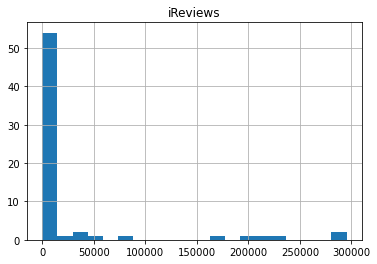

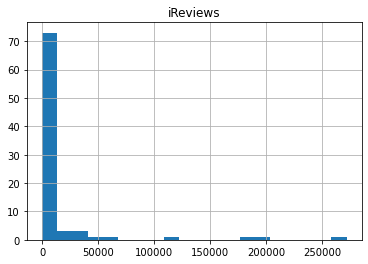

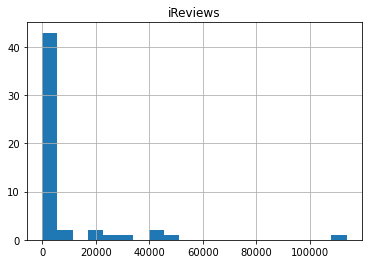

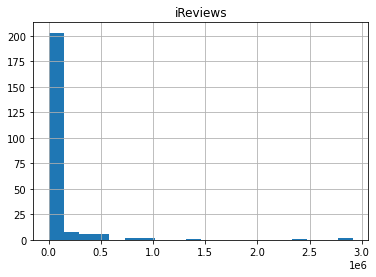

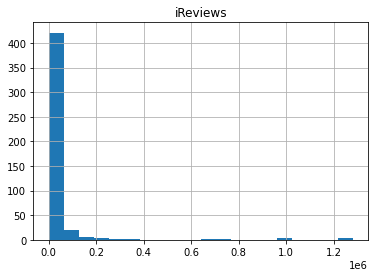

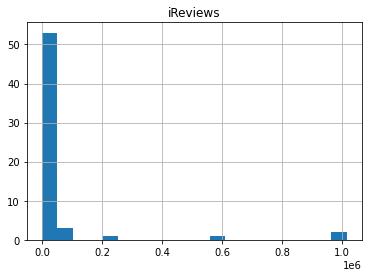

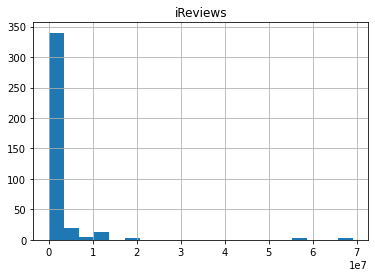

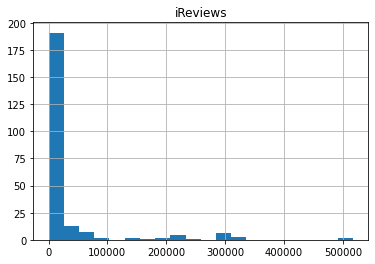

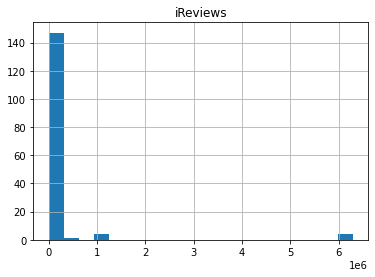

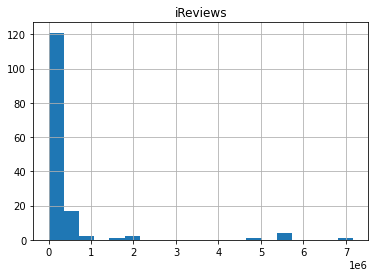

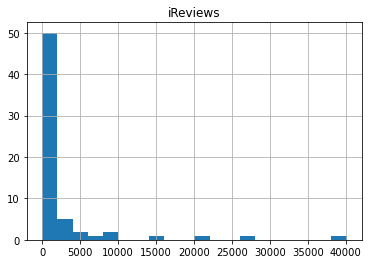

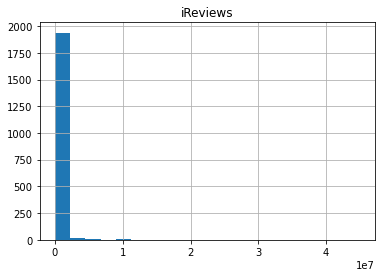

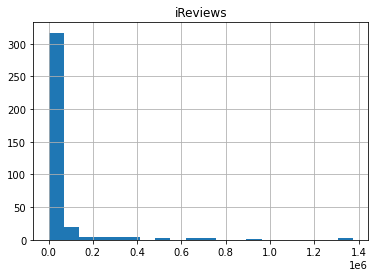

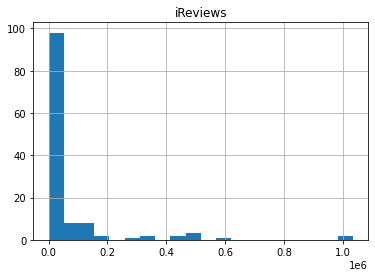

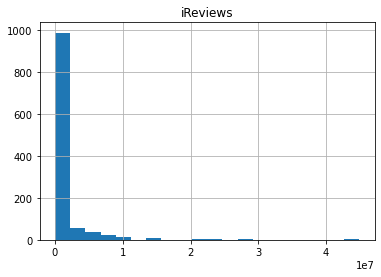

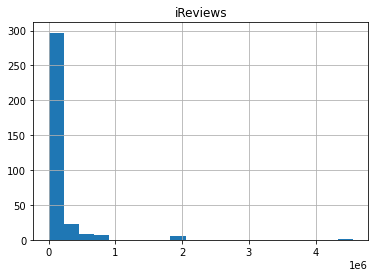

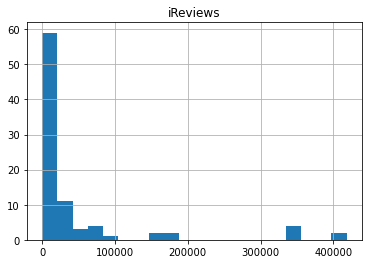

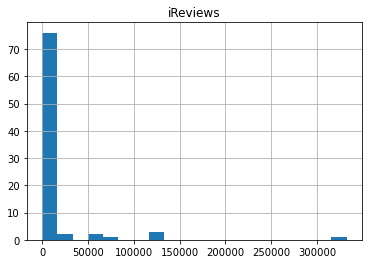

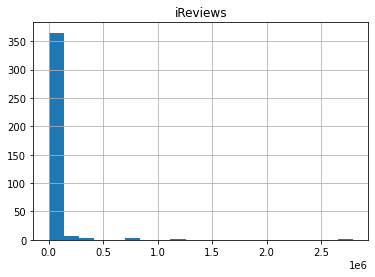

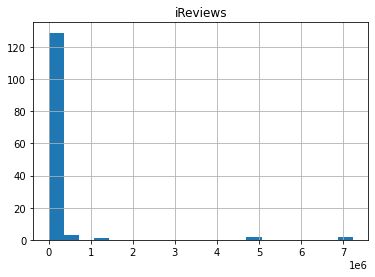

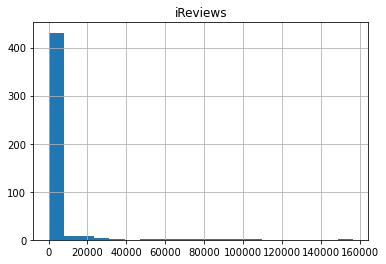

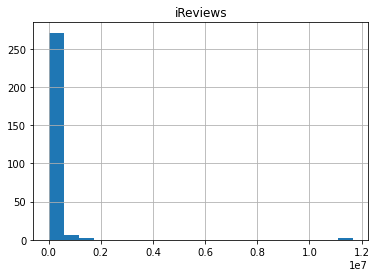

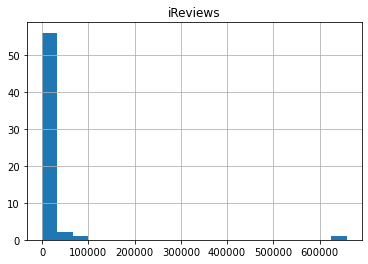

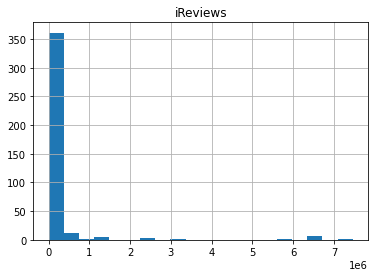

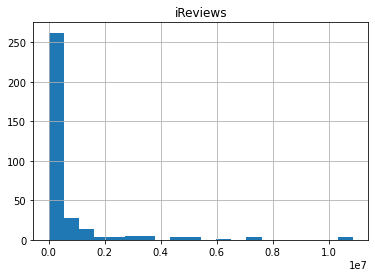

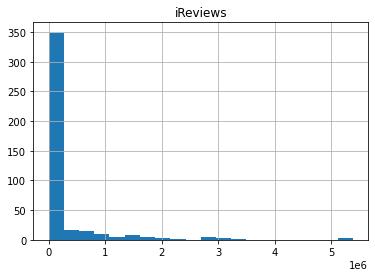

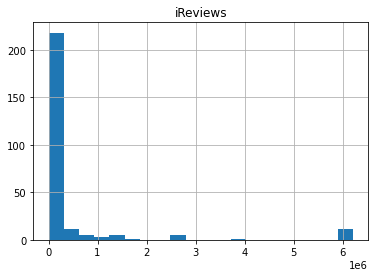

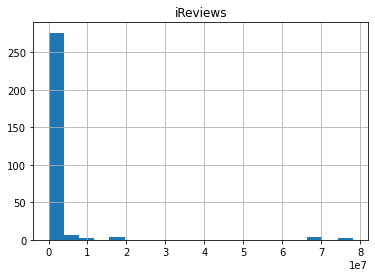

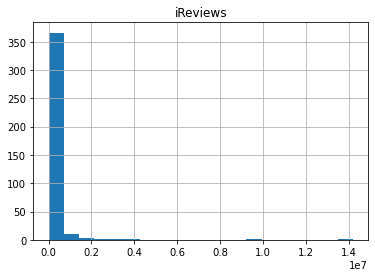

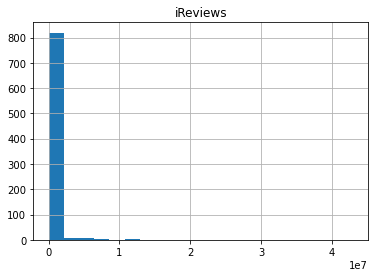

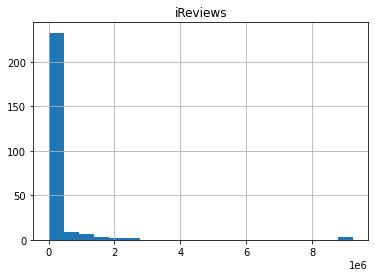

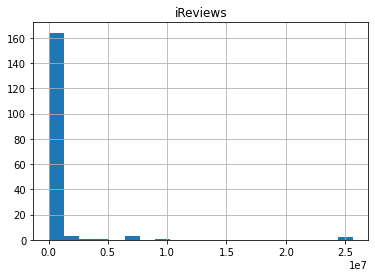

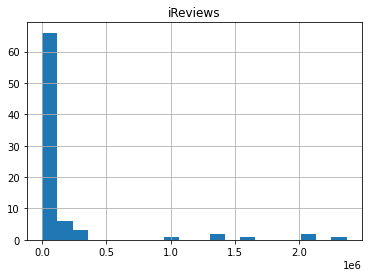

In [22]:
# Note from Mike Collins, Friday Aug 28th 12:24 PM CDT
# My next steps here with Question 1 would be to make plots of the above data
# The plots would help me decide which categories have the most robust ratings data.
grouped_by_category.hist(column="iReviews", bins=20)

# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
--- 

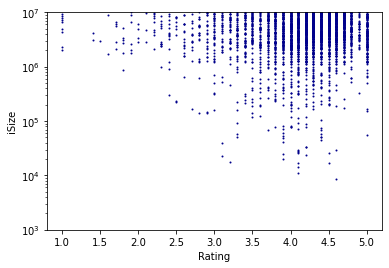

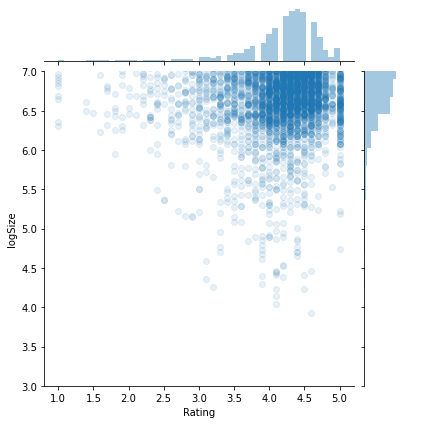

In [40]:
import numpy as np

google_play_df = pd.read_csv("data/google-play-store-apps/googleplaystore.csv")
# print(google_play_df.describe)
# print()

print(google_play_df.info())
print()

clean_df = google_play_df.loc[(google_play_df["Category"] != "1.9") & 
                              (google_play_df["Rating"] >= 0) &
                              (google_play_df["Rating"] <= 5)
                             ]

def reviews_cleanup(s):
    if isinstance(s, float):
        new_s = float(s)
    elif isinstance(s, str):
        v = float("".join([r for r in s if not r in ["k", "M"]]))
        if s.endswith("k"):
            new_s = v * 1000
        elif s.endswith("M"):
            new_s = v * 1000000
        else:
            new_s = v
    return int(new_s)

def installs_cleanup(s):
    return int("".join([r for r in s if not r in [",", "+"]]))

def sizes_cleanup(s):
    if s == "Varies with device":
        return int(0)
    
    v = float("".join([r for r in s if not r in ["k", "M"]]))
    if s.endswith("k"):
        new_s = v * 1000
    elif s.endswith("M"):
        new_s = v * 1000000
    else:
        new_s = v
    return int(new_s)

def log_sizes_cleanup(s):
    if s == "Varies with device":
        return np.log10(0.001)
    
    v = float("".join([r for r in s if not r in ["k", "M"]]))
    if s.endswith("k"):
        new_s = v * 1000
    elif s.endswith("M"):
        new_s = v * 1000000
    else:
        new_s = v
    return np.log10(new_s)

reviews_raw = clean_df['Reviews']
reviews_clean = reviews_raw.apply(lambda s: reviews_cleanup(s))
clean_df.insert(clean_df.columns.to_list().index("Reviews") + 1, "iReviews", reviews_clean)

installs_raw = clean_df['Installs']
installs_clean = installs_raw.apply(lambda s: installs_cleanup(s))
clean_df.insert(clean_df.columns.to_list().index("Installs") + 1, "iInstalls", installs_clean)

sizes_raw = clean_df['Size']
sizes_clean = sizes_raw.apply(lambda s: sizes_cleanup(s))
log_sizes_clean = sizes_raw.apply(lambda s: log_sizes_cleanup(s))
clean_df.insert(clean_df.columns.to_list().index("Size") + 1, "iSize", sizes_clean)
clean_df.insert(clean_df.columns.to_list().index("Size") + 1, "logSize", log_sizes_clean)

print(clean_df.info())

# split_along_rows = 0
# # Here is what happens if we group by Rating
# grouped_by_rating = clean_df.groupby(by=["Rating"], axis=split_along_rows)
# print(grouped_by_rating.describe())

clean_df.plot.scatter(x='Rating',
                      y='iSize',
                      s=1,
                      c='DarkBlue', logy=True, ylim=(10**3,10**7) )


import seaborn as sns

sns.jointplot(x="Rating", y="logSize", data=clean_df, ylim=(3,7), alpha=0.1);


# For this next section, choose a Category of playstore apps

## Category Chosen: [insert here]



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

# Question 4: You choose what you want to investigate